<a href="https://colab.research.google.com/github/Agneya-1BM22CS024/ML_Lab/blob/main/1BM22CS024_Lab4_Linear_Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df = pd.read_csv('/content/housing_area_price.csv')
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(df[['area']],df['price'],test_size=0.4)

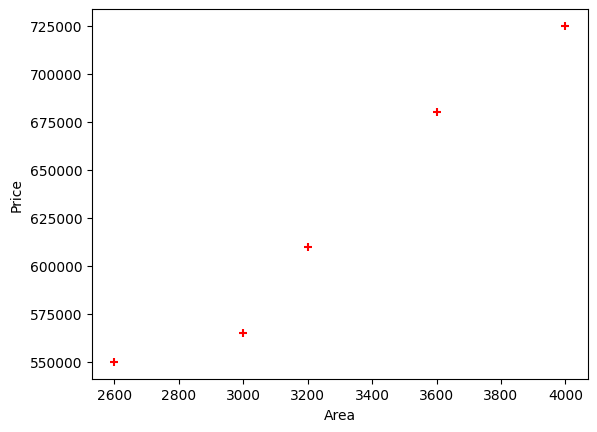

In [39]:
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [45]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [46]:
Y_pred = reg.predict(X_test)

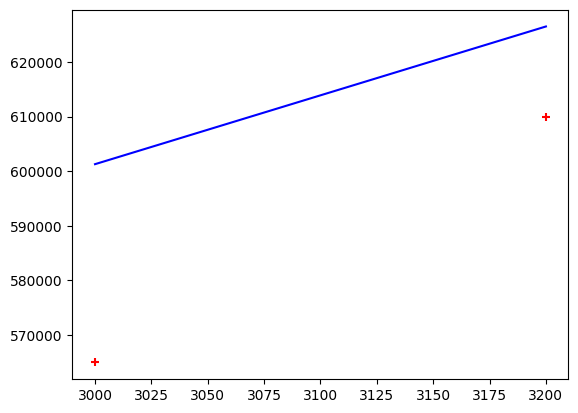

In [47]:
plt.scatter(X_test,Y_test,color='red',marker='+')
plt.plot(X_test,Y_pred,color='blue')
plt.show()

In [14]:
reg.predict([[5000]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [13]:
print(reg.intercept_," : " , reg.coef_)

180616.43835616432  :  [135.78767123]


Question 1 of Linear Regression here:

In [76]:
df = pd.read_csv('/content/canada_per_capita_income.csv')
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


Text(0, 0.5, 'Per capita income')

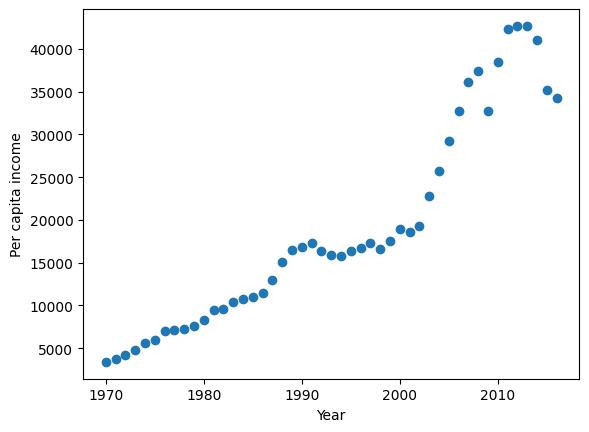

In [77]:
plt.scatter(df['year'],df['per capita income (US$)'])
plt.xlabel('Year')
plt.ylabel('Per capita income')

In [78]:
X_train,X_test,Y_train,Y_test = train_test_split(df[['year']],df['per capita income (US$)'],test_size=0.2)

In [79]:
reg.fit(X_train,Y_train)
print("a0: ",reg.intercept_)
print('a1: ',reg.coef_[0])

a0:  -1640698.9436009026
a1:  832.7982050128883


In [80]:
print("Predicted per capita income ($)",reg.predict([[2020]])[0])

Predicted per capita income ($) 41553.43052513176


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


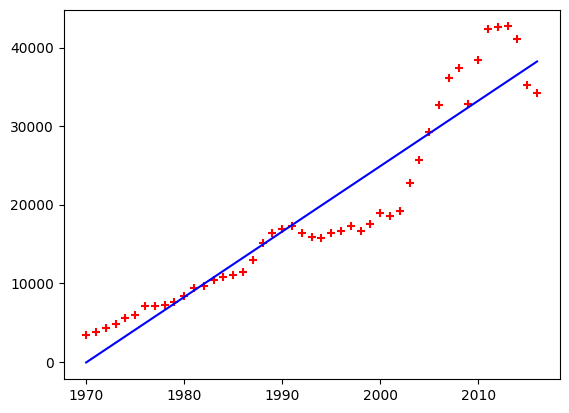

In [81]:
Y_pred = reg.predict(df[['year']])
plt.scatter(df['year'],df['per capita income (US$)'],color='red',marker='+')
plt.plot(df['year'], Y_pred, color='blue')
plt.show()

In [82]:
mae = mean_absolute_error(y_true=Y_test,y_pred=reg.predict(X_test))
mse = mean_squared_error(y_true=Y_test,y_pred=reg.predict(X_test))
print("Mean Absolute Error: ",mae)
print("Mean Squared Error: ",mse)

Mean Absolute Error:  2533.647193917463
Mean Squared Error:  12556106.7998391


Question 2 of Linear Regression here:

In [57]:
df = pd.read_csv('/content/salary.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [59]:
df.fillna(0,inplace=True)

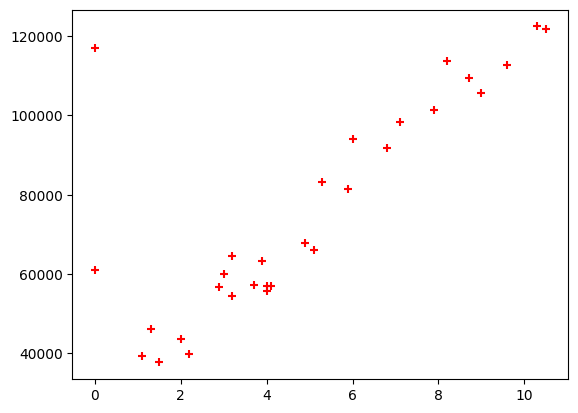

In [61]:
plt.scatter(df['YearsExperience'],df['Salary'],color='r',marker='+')
plt.show()

In [62]:
X_train,X_test,Y_train,Y_test = train_test_split(df[['YearsExperience']],df['Salary'],test_size=0.2)

In [63]:
reg2 = LinearRegression()
reg2.fit(X_train,Y_train)
print("a0: ",reg2.intercept_)
print('a1: ',reg2.coef_[0])

a0:  46425.24875068109
a1:  6409.130322979733


In [64]:
reg2.predict([[12]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([123334.81262644])

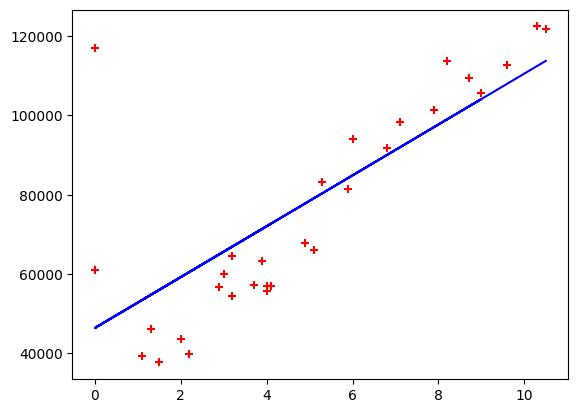

In [66]:
Y_pred = reg2.predict(df[['YearsExperience']])
plt.scatter(df['YearsExperience'],df['Salary'],color='r',marker='+')
plt.plot(df['YearsExperience'],Y_pred,color='b')
plt.show()

In [71]:
mae = mean_absolute_error(y_true=Y_test,y_pred=reg2.predict(X_test))
mse = mean_squared_error(y_true=Y_test,y_pred=reg2.predict(X_test))
print("Mean Absolute Error: ",mae)
print("Mean Squared Error: ",mse)

Mean Absolute Error:  13267.916293084798
Mean Squared Error:  200892343.2494758


Question 1 of Multiple Linear Regression

In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [89]:
df = pd.read_csv('/content/hiring.csv')
print(df.head())
print(df.isna().sum())

  experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64


In [93]:
df.fillna({'experience':0, 'test_score(out of 10)': df['test_score(out of 10)'].mean()},inplace=True)

In [94]:
df['experience'] = pd.to_numeric(df['experience'], errors='coerce')

In [95]:
X_train,X_test,Y_train,Y_test = train_test_split(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'],test_size=0.2)
reg3 = LinearRegression()
reg3.fit(X_train,Y_train)

LinearRegression()

In [106]:
reg3.coef_

array([    0.        ,   659.47242206, -1990.40767386])

In [107]:
reg3.intercept_

75920.86330935251

In [97]:
print(reg3.predict([[2,9,6]]))
print(reg3.predict([[12,10,10]]))

[69913.66906475]
[62611.51079137]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [100]:
mae = mean_absolute_error(y_true=Y_test,y_pred=reg3.predict(X_test))
mse = mean_squared_error(y_true=Y_test,y_pred=reg3.predict(X_test))
print("Mean Absolute Error: ",mae)
print("Mean Squared Error: ",mse)

Mean Absolute Error:  14542.309009934906
Mean Squared Error:  305799512.73161453


Question 2 of Multiple Linear Regression Starts here:

           R&D Spend  Administration  Marketing Spend         Profit  \
count    1000.000000     1000.000000      1000.000000    1000.000000   
mean    81668.927200   122963.897612    226205.058419  119546.164656   
std     46537.567891    12613.927535     91578.393542   42888.633848   
min         0.000000    51283.140000         0.000000   14681.400000   
25%     43084.500000   116640.684850    150969.584600   85943.198543   
50%     79936.000000   122421.612150    224517.887350  117641.466300   
75%    124565.500000   129139.118000    308189.808525  155577.107425   
max    165349.200000   321652.140000    471784.100000  476485.430000   

       State_Florida  State_New York  
count    1000.000000     1000.000000  
mean        0.322000        0.334000  
std         0.467477        0.471876  
min         0.000000        0.000000  
25%         0.000000        0.000000  
50%         0.000000        0.000000  
75%         1.000000        1.000000  
max         1.000000        1.000000  


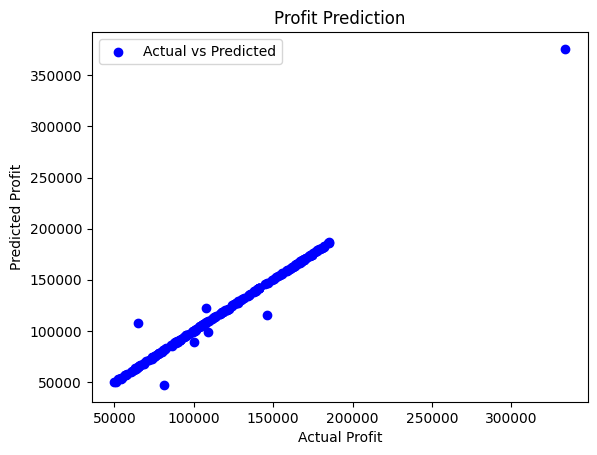

Coefficients: [ 5.33045605e-01  1.13893831e+00  8.30755037e-02 -8.74491486e+02
 -9.71337988e+01]
Intercept: -82439.15560711118
Predicted profit for given candidate: 554066.30 US$
Mean Absolute Error (MAE): 1404.44
Mean Squared Error (MSE): 30775142.86
R-squared (R2) Score: 0.98


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("1000_Companies.csv")

# Handle missing values by removing rows with NaN
data = data.dropna()

# Encode categorical variable (State) using OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
state_encoded = encoder.fit_transform(data[['State']])
state_encoded_df = pd.DataFrame(state_encoded, columns=encoder.get_feature_names_out(['State']))

# Concatenate encoded state data with original dataset
data = pd.concat([data.drop(['State'], axis=1), state_encoded_df], axis=1)

# Analyze data distribution
print(data.describe())
print(data.info())

# Define independent (X) and dependent (y) variables
X = data[['R&D Spend', 'Administration', 'Marketing Spend'] + list(state_encoded_df.columns)]
y = data['Profit']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the results
y_pred = model.predict(X_test)

# Visualize prediction
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Profit Prediction")
plt.legend()
plt.show()

# Check values of coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Predict profit for given candidate dynamically
state_names = encoder.get_feature_names_out(['State'])
florida_encoded = (state_names == "State_Florida").astype(int)
candidate_features = np.array([91694.48, 515841.3, 11931.24] + list(florida_encoded)).reshape(1, -1)
profit_prediction = model.predict(candidate_features)
print(f"Predicted profit for given candidate: {profit_prediction[0]:.2f} US$")

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")
